<a href="https://colab.research.google.com/github/dduniverse/datacampus/blob/main/%EB%AF%B8%EA%B5%AD_%EC%8B%A0%EC%83%9D%EC%95%84_%EC%9D%B4%EB%A6%84_%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Colab 설정

#### Colab에서 한글 사용하기

In [ ]:
!apt install fonts-nanum* 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 62 not upgraded.
Need to get 37.0 MB of archives.
After this operation, 145 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-eco all 1.000-6 [14

In [ ]:
!rm ~/.cache/matplotlib -rf

#### 이후 런타임 재실행

In [ ]:
# 위 두개 실행 후 런타임 -> 런타임 다시 시작 

# 미국 SSN에 등록된 신생아 이름 데이터

## 데이터 분석

#### 필요 모듈 import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive

In [ ]:
plt.rc('figure',figsize=(10,6))
plt.rc('font',family='NanumBarunGothic')

drive.mount('/content/drive')
path='/content/drive/My Drive/Colab Notebooks/데청캠/baby'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 1880년 신생아 이름 출력하기

In [ ]:
df_names1880=pd.read_csv(path+'/yob1880.txt',names=['name','gender','number'])
df_names1880
# yob1880 파일에는 컬럼 정보가 없기 때문에, names로 컬럼사용

,name,gender,number
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


#### 성별 신생아 수
- gender 기준으로 객체 DataFrame을 합침

In [ ]:
df_names1880.groupby('gender')['number'].sum() 
# gender 기준으로 그룹핑하여(남,여) number의 합

gender
F     90994
M    110490
Name: number, dtype: int64

#### 전체 이름 불러오기

In [ ]:
years=range(1880,2022)
pieces=list()
columns=['name','gender','number']

for year in years:
  print(year,end=': ') # 몇 년도를 작업하고 있는지 보기위한 print 문
  df_names=pd.read_csv(path+'/yob'+str(year)+'.txt',names=columns) # yob(년도).txt 형태의 파일 읽어오기
  df_names['year']=year # year 컬럼 추가
  pieces.append(df_names) # pieces 리스트에 df_names 자료 추가

df_names_all=pd.concat(pieces, ignore_index=True) # pieces에 있는 데이터프레임 자료 연결, 기존의 인덱스 무시

1880: 1881: 1882: 1883: 1884: 1885: 1886: 1887: 1888: 1889: 1890: 1891: 1892: 1893: 1894: 1895: 1896: 1897: 1898: 1899: 1900: 1901: 1902: 1903: 1904: 1905: 1906: 1907: 1908: 1909: 1910: 1911: 1912: 1913: 1914: 1915: 1916: 1917: 1918: 1919: 1920: 1921: 1922: 1923: 1924: 1925: 1926: 1927: 1928: 1929: 1930: 1931: 1932: 1933: 1934: 1935: 1936: 1937: 1938: 1939: 1940: 1941: 1942: 1943: 1944: 1945: 1946: 1947: 1948: 1949: 1950: 1951: 1952: 1953: 1954: 1955: 1956: 1957: 1958: 1959: 1960: 1961: 1962: 1963: 1964: 1965: 1966: 1967: 1968: 1969: 1970: 1971: 1972: 1973: 1974: 1975: 1976: 1977: 1978: 1979: 1980: 1981: 1982: 1983: 1984: 1985: 1986: 1987: 1988: 1989: 1990: 1991: 1992: 1993: 1994: 1995: 1996: 1997: 1998: 1999: 2000: 2001: 2002: 2003: 2004: 2005: 2006: 2007: 2008: 2009: 2010: 2011: 2012: 2013: 2014: 2015: 2016: 2017: 2018: 2019: 2020: 2021: 

#### 연도별 신생아 수
- pivot_table은 
- 매개변수 index를 index정보로,
- 매개변수 columns를 Column으로 하는 
- 매개변수 values의 특정행동(=aggfunc) 결과를 DataFrame으로 생성

In [ ]:
total_births=df_names_all.pivot_table('number', # 데이터
                                      index='year', # index는 year
                                      columns='gender', # 컬럼으로는 year 사용
                                      aggfunc=sum) # 통계치 구할 함수로 sum 사용 
total_births.tail() # 끝에서 5개의 데이터 보기

gender,F,M
year,,
2017,1723043,1847191
2018,1696917,1811738
2019,1673030,1788414
2020,1609171,1718248
2021,1627098,1734277


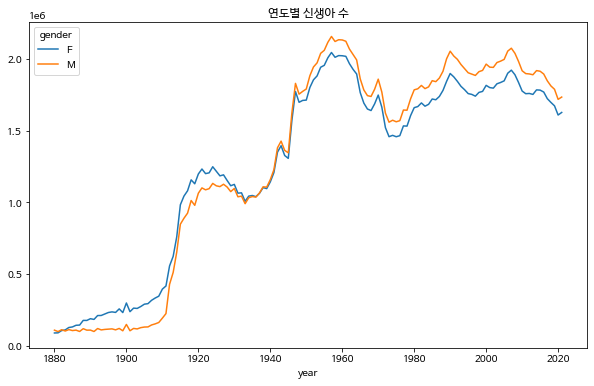

In [ ]:
total_births.plot(title='연도별 신생아 수')
plt.show()

#### 각 이름이 전체 신생아 수에서 차지하는 비율

In [ ]:
def add_prop(group):
  group['prop']=group['number']/group['number'].sum() # prop 열 추가
  return group

In [ ]:
df_names_prop=df_names_all.groupby(['year','gender']).apply(add_prop) # year,gender 기준으로 그룹핑 -> add_prop 함수에 적용
df_names_prop

,name,gender,number,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
2052776,Zyeire,M,5,2021,0.000003
2052777,Zyel,M,5,2021,0.000003
2052778,Zyian,M,5,2021,0.000003
2052779,Zylar,M,5,2021,0.000003


#### 비율의 합 출력
- 연도/성별로 나눈 모든 비율의 합이 1인지 확인

#### 각 이름이 차지하는 비율 중 상위 1000개

In [ ]:
df_names_prop.groupby(['year','gender'])['prop'].sum() 
# year,gender 기준으로 그룹핑 -> prop 합
# 전체에 대한 비율(prop)의 합이므로 1.0이 나옴.

year  gender
1880  F         1.0
      M         1.0
1881  F         1.0
      M         1.0
1882  F         1.0
               ... 
2019  M         1.0
2020  F         1.0
      M         1.0
2021  F         1.0
      M         1.0
Name: prop, Length: 284, dtype: float64

#### 각 이름이 차지하는 비율 중 상위 1000개
- year,gende 기준으로 그룹핑
- group에서 number기준 내림차순 정렬 -> 앞에서부터 1000개 pieces 리스트에 추가
- pieces의 데이터프레임 연결, 인덱스는 제거

In [ ]:
pieces=list()

for year_gender, group in df_names_prop.groupby(['year','gender']):
  pieces.append(group.sort_values(by='number',ascending=False)[:1000])

top1000=pd.concat(pieces,ignore_index=True)
top1000

,name,gender,number,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
283871,Zev,M,218,2021,0.000126
283872,Harris,M,217,2021,0.000125
283873,Ronnie,M,217,2021,0.000125
283874,Merrick,M,217,2021,0.000125


#### 연도별 선호하는 신생아 이름 상위 1000개
- top1000_boys: 성별이 M인 이름 중 상위 1000개
- top1000_girls: 성별이 F인 이름 중 상위 1000개

In [ ]:
top1000_boys=top1000[top1000['gender']=='M']
top1000_girls=top1000[top1000['gender']=='F']

In [ ]:
top1000_boys.head()

,name,gender,number,year,prop
942,John,M,9655,1880,0.087383
943,William,M,9532,1880,0.086270
944,James,M,5927,1880,0.053643
945,Charles,M,5348,1880,0.048403
946,George,M,5126,1880,0.046393


In [ ]:
top1000_girls.head()

,name,gender,number,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


#### 연도별 선호하는 이름 변화

In [ ]:
total_number=top1000.pivot_table('number',index='year',columns='name',aggfunc=sum)
total_number # 연도별 각 이름의 number 합

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aarna,Aaron,Aarush,Aarya,Ab,...,Zola,Zollie,Zona,Zora,Zoya,Zula,Zuri,Zyair,Zyaire,Zyon
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,...,7.0,NaN,8.0,28.0,NaN,27.0,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,...,10.0,NaN,9.0,21.0,NaN,27.0,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,...,9.0,NaN,17.0,32.0,NaN,21.0,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,...,10.0,NaN,11.0,35.0,NaN,25.0,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,...,14.0,6.0,8.0,58.0,NaN,27.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,241.0,291.0,4185.0,NaN,526.0,NaN,7211.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,850.0,NaN,301.0,NaN
2018,NaN,NaN,3834.0,NaN,488.0,NaN,5982.0,NaN,NaN,NaN,...,276.0,NaN,NaN,269.0,NaN,NaN,1131.0,NaN,323.0,NaN
2019,NaN,NaN,3654.0,NaN,419.0,NaN,5529.0,NaN,NaN,NaN,...,265.0,NaN,NaN,353.0,NaN,NaN,1181.0,NaN,540.0,213.0


##### 남여 1,3등 이름이 몇번 사용되었는지 확인하는 코드

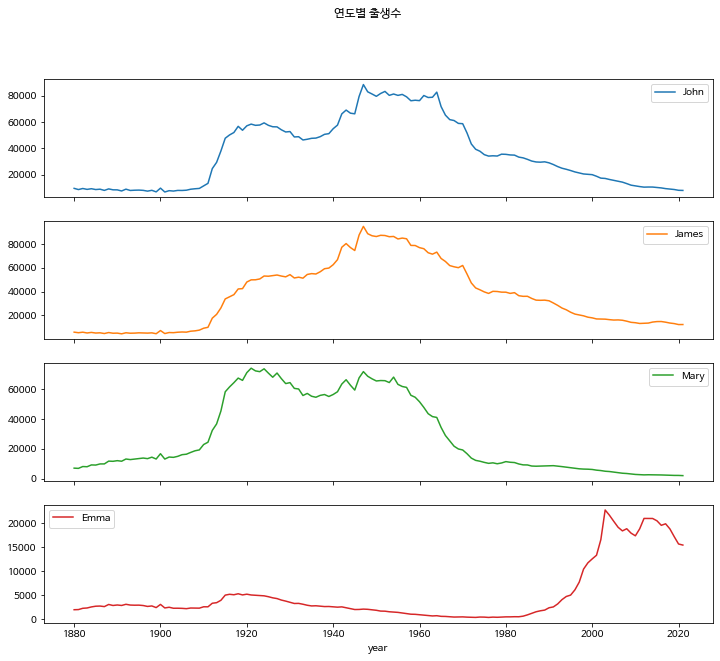

In [ ]:
subset=total_number[['John','James','Mary','Emma']] 
subset.plot(subplots=True,figsize=(12,10),title='연도별 출생수') # subplots=true->각각 , false->하나의 그래프에 모두
plt.show()

#### 신생아 이름의 다양성 분석

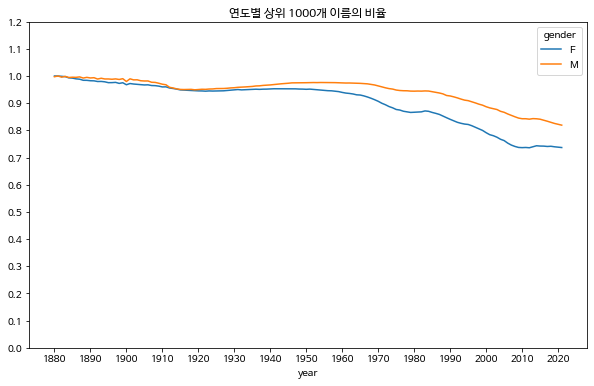

In [ ]:
table=top1000.pivot_table('prop',index='year',columns='gender',aggfunc=sum) # prop 데이터에 대해 index는 year, columns는 gender, 집계함수는 sum
table.plot(title='연도별 상위 1000개 이름의 비율', yticks=np.linspace(0,1.2,13),xticks=range(1880,2030,10))
plt.show() # y범위:0~1.2까지 13 분할, x범위:1880~2030까지 10단위

##### 2021년 상위 1000개의 이름 통계

In [ ]:
df=top1000_boys[top1000_boys['year']==2021] # 2021년도만 골라서 df에 저장
df_prop_cumsum=df.sort_values(by='prop',ascending=False)['prop'].cumsum() # prop기준으로 내림차순 정렬->prop 누적 합

In [ ]:
df # 2021년도 남자 이름 상위1000개

,name,gender,number,year,prop
282876,Liam,M,20272,2021,0.011689
282877,Noah,M,18739,2021,0.010805
282878,Oliver,M,14616,2021,0.008428
282879,Elijah,M,12708,2021,0.007328
282880,James,M,12367,2021,0.007131
...,...,...,...,...,...
283871,Zev,M,218,2021,0.000126
283872,Harris,M,217,2021,0.000125
283873,Ronnie,M,217,2021,0.000125
283874,Merrick,M,217,2021,0.000125


In [ ]:
df_prop_cumsum[:10] # 2021년도 남자 이름 상위1000개 비율 누적 합, 앞에서부터 10개만 보여줌

282876    0.011689
282877    0.022494
282878    0.030922
282879    0.038249
282880    0.045380
282881    0.052350
282882    0.059149
282883    0.065781
282884    0.072300
282885    0.077798
Name: prop, dtype: float64

In [ ]:
df_prop_cumsum.values.searchsorted(0.5) # 2021년도 남자 이름 상위1000개 비율 누적 합이 0.5가 되는 위치

166

In [ ]:
print(df_prop_cumsum.values[165])
print(df_prop_cumsum.values[166]) # 166개가 전체 이름의 50%를 차지하고 있다.
print(df_prop_cumsum.values[167])

0.49977887038806373
0.5010952690948447
0.5024059017100497


##### 1921년 상위 1000개의 이름의 통계

In [ ]:
df=top1000_boys[top1000_boys['year']==1921] # 1921년도
df_prop_cumsum=df.sort_values(by='prop',ascending=False)['prop'].cumsum()
df_prop_cumsum.values.searchsorted(0.5)

29

In [ ]:
print(df_prop_cumsum.values[28])
print(df_prop_cumsum.values[29]) # 20개의 이름이 전체의 50%를 차지하고 있다. -> 과거에는 이름의 다양성이 적었다.
print(df_prop_cumsum.values[30])

0.49670483112883707
0.5031299337879417
0.5092617895685821


In [ ]:
df=top1000_boys[top1000_boys['year']==1880] # 1880년도
df_prop_cumsum=df.sort_values(by='prop',ascending=False)['prop'].cumsum()
df_prop_cumsum.values.searchsorted(0.5)

13

In [ ]:
print(df_prop_cumsum.values[12])
print(df_prop_cumsum.values[13]) # 13개의 이름이 전체의 50% 차지 -> 다양성이 더더더더덛 적었다.
print(df_prop_cumsum.values[14])

0.4989229794551543
0.5133948773644673
0.5275952574893655


#### 신생아 이름의 마지막 글자의 변화
- df_name_all에서 name열의 마지막 글자만 가져와서 last_letters를 생성

In [ ]:
get_last_letter=lambda x:x[-1] # x의 마지막 값을 return
last_letters=df_names_all['name'].map(get_last_letter) # name열을 get_last_letter 함수에 적용
last_letters

0          y
1          a
2          a
3          h
4          e
          ..
2052776    e
2052777    l
2052778    n
2052779    r
2052780    n
Name: name, Length: 2052781, dtype: object

- last_letter와 columns정보 gender,year를 기준으로 number의 합 table 생성

In [ ]:
last_letters.name='last_letter'

table=df_names_all.pivot_table('number',index=last_letters,columns=['gender','year'],aggfunc=sum)
table # 마지막 글자의 number 합

gender             F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33381.0  34080.0  40399.0  41913.0  48089.0  49616.0  53883.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4783.0   5566.0   5701.0   6602.0   6623.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2910.0   3527.0   3848.0   4807.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3575.0   3836.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2038.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2824.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10467.0  10404.0  12143.0  12063.0  13918.0  13927.0  14932.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

gender                                  ...         M                      \
year            1887     1888     1889  ...      2012      2013      2014   
last_letter                             ...                                 
a            48942.0  59440.0  58631.0  ...   27227.0   27473.0   28318.0   
b                NaN      NaN      NaN  ...   34745.0   33278.0   31410.0   
c                NaN      NaN      NaN  ...   24293.0   24090.0   23847.0   
d             1027.0   1298.0   1374.0  ...   42520.0   42719.0   44077.0   
e            54353.0  66748.0  66662.0  ...  128591.0  132323.0  132195.0   
f                NaN      NaN      NaN  ...    2482.0    2593.0    2882.0   
g               25.0     44.0     28.0  ...    3807.0    4430.0    4724.0   
h             7141.0   8630.0   8825.0  ...   99135.0  100022.0  102156.0   
i              105.0    141.0    134.0  ...   47156.0   45456.0   46634.0   
j                NaN      NaN      NaN  ...    1500.0    1405.0    1360.0   
k               19.0     21.0     22.0  ...   34141.0   34887.0   35794.0   
l             6174.0   7900.0   8395.0  ...  129078.0  126884.0  127612.0   
m               90.0    123.0    137.0  ...   55109.0   57108.0   58765.0   
n             5512.0   6832.0   7103.0  ...  682713.0  669666.0  673646.0   
o               97.0    134.0    142.0  ...   78259.0   79519.0   82402.0   
p                NaN      NaN      NaN  ...    2527.0    2598.0    2524.0   
q                NaN      NaN      NaN  ...     337.0     336.0     312.0   
r              910.0   1207.0   1214.0  ...  167657.0  170458.0  178236.0   
s             2803.0   3581.0   3569.0  ...  122072.0  123889.0  128272.0   
t             3140.0   3816.0   3784.0  ...

##### 신생아 이름의 마지막 글자의 비율

In [ ]:
subtable=table.reindex(columns=[1900,1930,1960,1990,2020],level='year') 
# 1900,1030,1960,1990,2020년 자료만 추출

letter_prop=subtable/subtable.sum() # 마지막 글자의 수에 대한 비율
letter_prop

gender              F                                                 M  \
year             1900      1930      1960      1990      2020      1900   
last_letter                                                               
a            0.299870  0.256127  0.341882  0.378838  0.382010  0.005782   
b                 NaN  0.000018  0.000343  0.000082  0.000329  0.002472   
c                 NaN  0.000012  0.000024  0.000194  0.000554  0.001987   
d            0.012242  0.010779  0.001846  0.001339  0.002368  0.102893   
e            0.357133  0.271315  0.215138  0.178448  0.177215  0.151013   
f                 NaN       NaN  0.000010  0.000017  0.000100  0.000771   
g            0.000110  0.000079  0.000157  0.000365  0.000441  0.001681   
h            0.051035  0.035044  0.036223  0.045091  0.069228  0.041428   
i            0.001201  0.001963  0.039963  0.024046  0.047694  0.001030   
j                 NaN       NaN       NaN  0.000010  0.000088       NaN   
k            0.000100  0.000208  0.000155  0.000255  0.000360  0.040365   
l            0.048884  0.024794  0.033871  0.034460  0.021234  0.061857   
m            0.001024  0.001377  0.008611  0.001287  0.004165  0.071792   
n            0.060899  0.107495  0.130675  0.114866  0.113894  0.137616   
o            0.001161  0.003688  0.002440  0.001479  0.002169  0.011743   
p                 NaN  0.000025  0.000023  0.000042  0.000094  0.002871   
q                 NaN       NaN       NaN       NaN  0.000042       NaN   
r            0.012092  0.010176  0.006766  0.036490  0.033279  0.068356   
s            0.031518  0.067705  0.012764  0.008353  0.011786  0.133236   
t            0.023229  0.026162  0.015198  0.005246  0.014757  0.068157   
u            0.001167  0.000794  0.000575  0.000202  0.000668  0.000179   
v                 NaN       NaN  0.000060  0.000003  0.000294  0.000126   
w            0.000020  0.000051  0.000031  0.000205  0.004174  0.006307   
x                 NaN  0.000029  0.000037  0.000299  0.002094  0.003509   
y            0.096280  0.180887  0.152551  0.167569  0.110301  0.084677   
z            0.002035  0.001272  0.000658  0.000815  0.000659  0.000153   

gender                                               
year             1930      1960      1990      2020  
last_letter                                          
a            0.003250  0.002446  0.025408  0.019671  
b            0.002753  0.001834  0.013619  0.010515  
c            0.001627  0.007250  0.014112  0.009691  
d            0.166919  0.122940  0.049677  0.022625  
e            0.120166  0.083838  0.071390  0.067766  
f            0.000420  0.004330  0.000655  0.001584  
g            0.001265  0.009489  0.002686  0.002668  
h            0.043037  0.037912  0.030185  0.054557  
i            0.000631  0.000610  0.004286  0.032479  
j                 NaN       NaN  0.000231  0.000850  
k            0.030822  0.049374  0.027887  0.020387  
l            0.063421  0.104892  0.094453  0.065405  
m            0.049155  0.033831  0.023919  0.032879  
n            0.139055  0.152513  0.254475  0.314598  
o            0.018595  0.012841  0.033246  0.060123  
p            0.003564  0.005674  0.003878  0.001514  
q                 NaN       NaN  0.000084  0.000192  
r            0.046802  0.031044  0.077035  0.095177  
s            0.128170  0.102699  0.084398  0.077977  
t            0.091740  0.065646  0.036193  0.032806  
u            0.000196  0.000057  0.000695  0.003373  
v            0.000046  0.000036  0.000165  0.001691  
w            0.003887  0.007707  0.040380  0.009996  
x            0.002818  0.001851  0.004810  0.011664  
y            0.081419  0.161003  0.104797  0.047805  
z            0.000240  0.000184  0.001336  0.002009

##### 신생아 이름의 마지막 글자 성별 빈도수 그래프

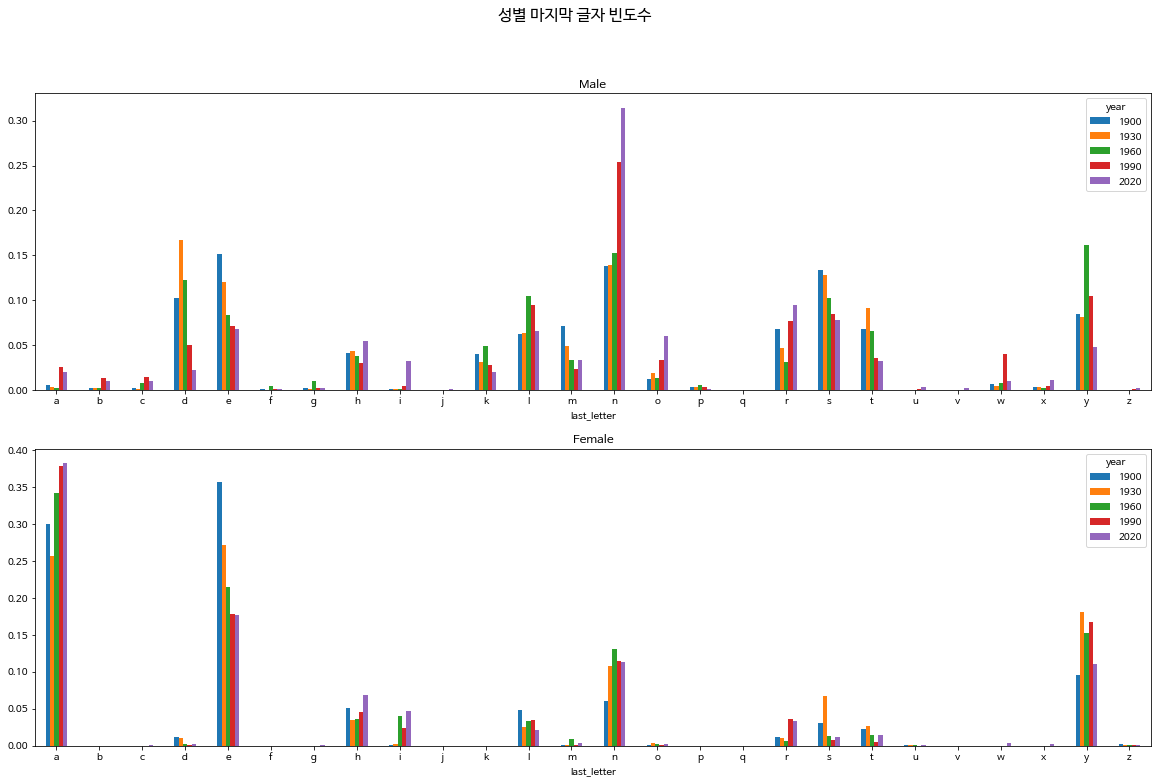

In [ ]:
fig, axes = plt.subplots(2,1,figsize=(20,12))
fig.suptitle('성별 마지막 글자 빈도수', fontsize=16)

letter_prop['M'].plot.bar(ax=axes[0],title='Male',rot=0) # Male은 0행에 출력
letter_prop['F'].plot.bar(ax=axes[1],title='Female',rot=0) # Female은 1행에 출력
# rot:글씨의 기울기(미설정시 누워서 출력됨.)
plt.show()

#### 남자 신생아 이름 중 흔한 마지막 글자 d e n y

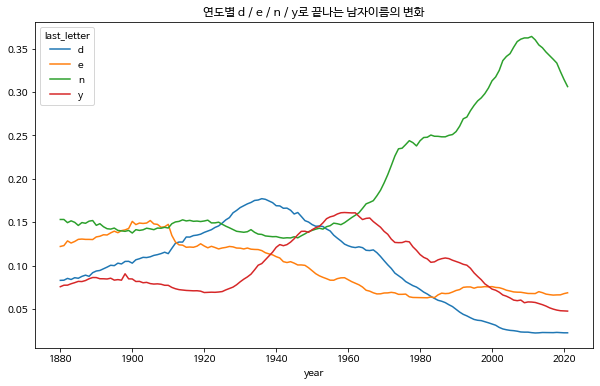

In [ ]:
letter_prop=table/table.sum()

deny_t=letter_prop.loc[['d','e','n','y'],'M'].T
deny_t.plot(title='연도별 d / e / n / y로 끝나는 남자이름의 변화')

plt.show()

#### 남자 신생아 이름과 여자 신생아 이름이 바뀐 경우

In [ ]:
all_names=pd.Series(top1000['name'].unique()) # 상위 1000개의 이름에서 중복 값 제거
lesley_like=all_names[all_names.str.lower().str.contains('lesl')] # all_names를 모두 소문자로 바뀐 뒤 lesl을 포함하는 것만 lesley_like에 저장
# 전체 이름 중, lesl 문자열이 들어간 이름만 추출

lesley_like

632     Leslie
2293    Lesley
4263    Leslee
4731     Lesli
6106     Lesly
dtype: object

In [ ]:
filtered=top1000[top1000['name'].isin(lesley_like)] #lesl이 들어간 이름만 뽑아 filtered에 저장
filtered

,name,gender,number,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2461,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4511,Leslie,F,9,1882,0.000083
...,...,...,...,...,...
274325,Leslie,F,703,2017,0.000408
276396,Leslie,F,600,2018,0.000354
278412,Leslie,F,571,2019,0.000341
280471,Leslie,F,486,2020,0.000302


In [ ]:
filtered.groupby('name')['number'].sum() # name으로 그룹핑한 후, number의 합

name
Leslee      1082
Lesley     35038
Lesli        929
Leslie    379721
Lesly      11433
Name: number, dtype: int64

In [ ]:
table=filtered.pivot_table('number',
                           index='year', 
                           columns='gender',
                           aggfunc='sum')
table=table.div(table.sum(1),axis=0) # 행방향으로(=세로방향=열gender 좌우분리) 피벗 테이블 분리
table.head()

gender,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


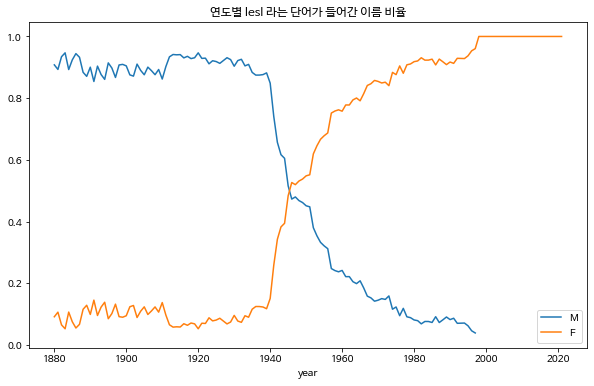

In [ ]:
table['M'].plot()
table['F'].plot()
plt.title('연도별 lesl 라는 단어가 들어간 이름 비율')
plt.legend() # 범례 표시
plt.show()